# Data Synthesis for Classification Models

In this notebook, we will generate synthetic data for a classification task. The dataset will be structured to simulate real-world data, containing various features and a binary target variable. We will also introduce missing values to mimic realistic data imperfections. The goal of creating this synthetic data is to practice handling such challenges in later stages of data preprocessing and modeling.



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Generation

We will generate a synthetic dataset containing numerical and categorical features. The reason behind the introduction of missing values is to practice and evaluate various imputation methods in our later analysis.


In [2]:
# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000



In [3]:
# Generating 5 input variables
x1 = np.random.randn(num_samples)
x2 = np.random.randn(num_samples) * 2 + 3
x3 = np.random.randint(0, 5, num_samples)
x4 = np.random.uniform(10, 50, num_samples)
x5 = np.random.normal(5, 3, num_samples)



In [4]:
# Generating target variable with classes [0, 1, 2]
y = np.random.choice([0, 1, 2], size=num_samples)

# Creating a DataFrame
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'x5': x5,
    'target': y
})

In [5]:
# Introducing missing values
num_missing = int(num_samples * 0.05)  # 5% missing values
cols = ['x1', 'x2', 'x3', 'x4', 'x5']

for col in cols:
    missing_indices = np.random.choice(df.index, size=num_missing, replace=False)
    df.loc[missing_indices, col] = np.nan

In [6]:
# Data preview
df.head()

# Explanatory Analysis
df.describe()

,x1,x2,x3,x4,x5,target
count,950.000000,950.000000,950.000000,950.000000,950.000000,1000.00000
mean,0.010836,3.141947,1.960000,29.988759,5.065529,0.98800
std,0.974340,1.996625,1.430689,11.600519,2.974289,0.80156
min,-3.241267,-2.880777,0.000000,10.007461,-2.947299,0.00000
25%,-0.651361,1.785410,1.000000,19.930783,3.127925,0.00000
50%,0.022757,3.134846,2.000000,30.081332,4.993266,1.00000
75%,0.637424,4.462775,3.000000,40.357627,7.071971,2.00000
max,3.852731,9.386215,4.000000,49.904913,15.973105,2.00000


### Synthetic Dataset Overview

The synthetic dataset consists of five features (`x1`, `x2`, `x3`, `x4`, and `x5`) and a `target` column.

#### Key Observations:
- There are 950 data points for the feature columns and 1,000 for the target. This suggests there are missing target values for 50 entries.
- **x1**: Values hover around a mean which is close to 0.
- **x2**: Displays a wider spread of values with a mean approximately at 3.14.
- **x3**: Appears to be uniformly distributed with values between 0 and 4.
- **x4**: Has a more extensive range, centering around a mean near 30.
- **x5**: Contains both positive and negative values, averaging at 5.06.
  
The `target` variable is categorical, ranging from 0 to 2. The mean value is close to 1, it is a classification problem with three classes.

In conclusion, the synthetic dataset features a mix of continuous variables with various distributions and a categorical target that have some missing values.


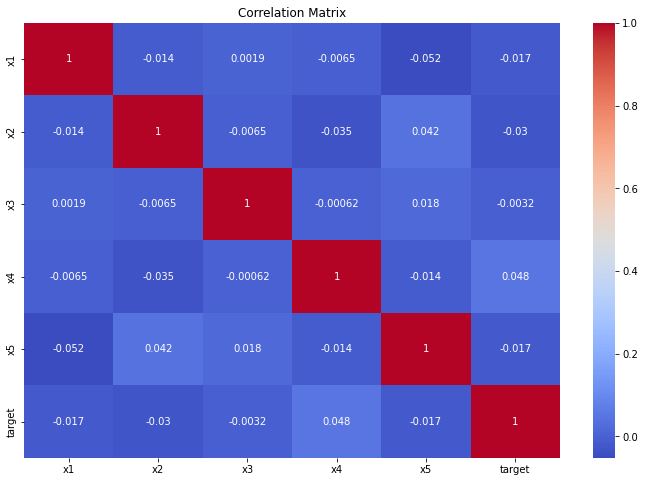

In [7]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

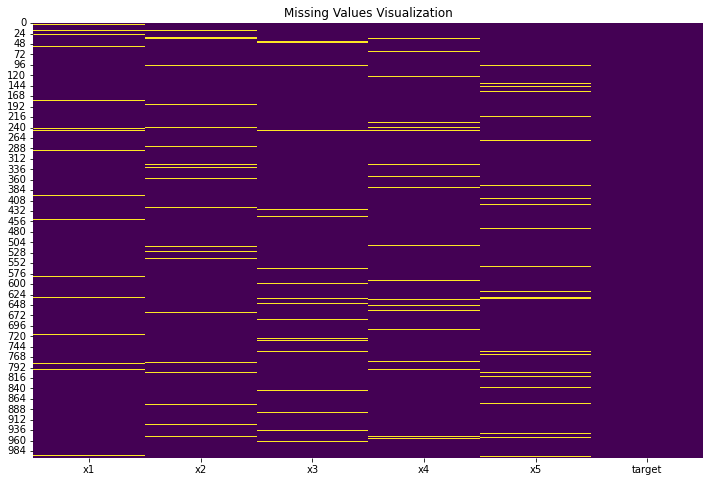

In [8]:
# Visualizing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()


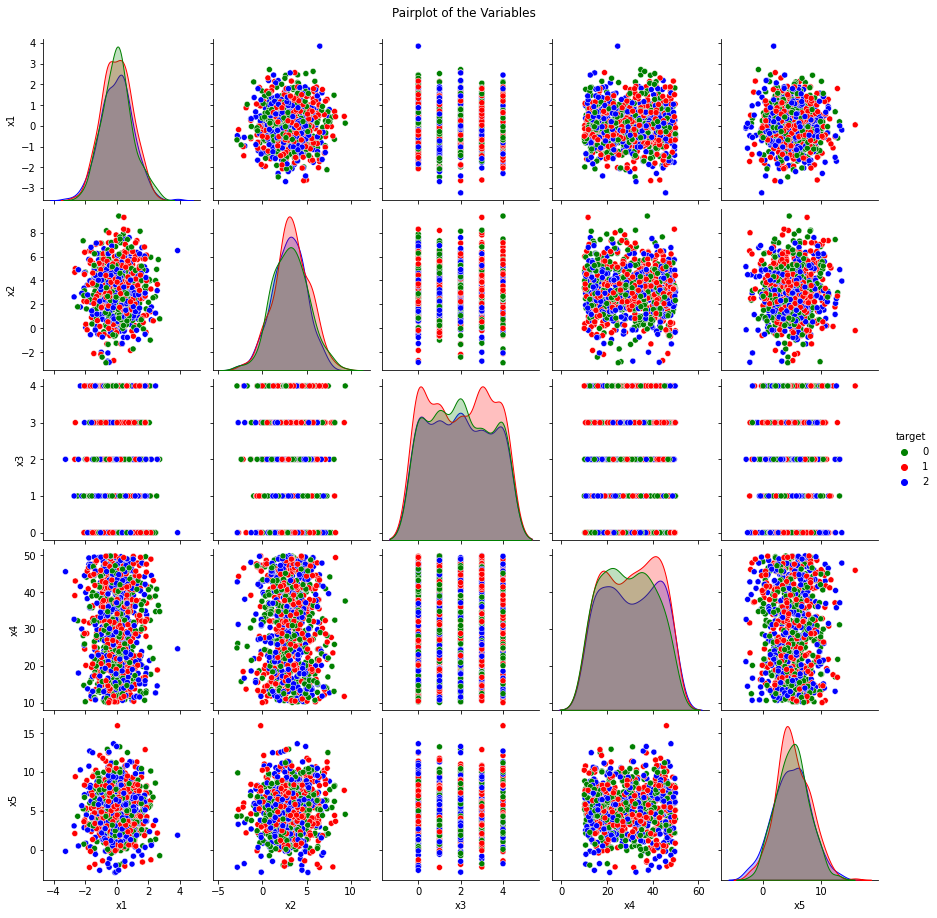

In [9]:
# Custom palette for visualization
palette_colors = {0: "green", 1: "red", 2: "blue"}

# Pairplot to visualize distributions and relations
sns.pairplot(df, hue='target', palette=palette_colors)
plt.suptitle("Pairplot of the Variables", y=1.02) 
plt.show()


In [10]:
# Save the dataset for future use
df.to_csv('synthetic_dataset.csv', index=False)